In [118]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
df = pd.read_csv("Student_Marks.csv")

In [120]:
df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


Esta celda carga los datos del archivo CSV "Student_Marks.csv" y muestra las primeras filas del DataFrame para darnos una idea del contenido y la estructura de los datos. Podemos ver que el DataFrame contiene tres columnas: `number_courses`, `time_study` y `Marks`, con un total de 100 filas.

In [121]:
df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [122]:
df.dtypes

number_courses      int64
time_study        float64
Marks             float64
dtype: object

In [123]:
df.isna().sum()

number_courses    0
time_study        0
Marks             0
dtype: int64

Podemos concluir que no hacen falta datos

array([[<Axes: title={'center': 'number_courses'}>,
        <Axes: title={'center': 'time_study'}>],
       [<Axes: title={'center': 'Marks'}>, <Axes: >]], dtype=object)

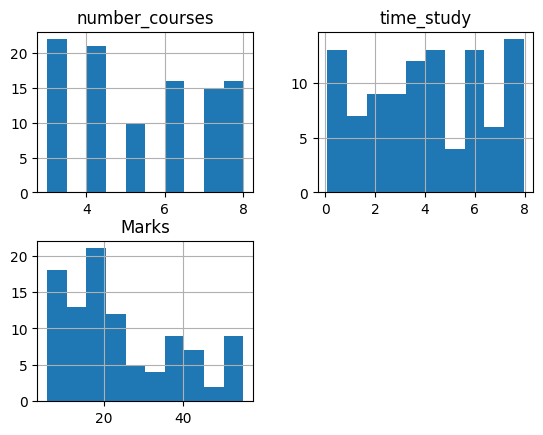

In [124]:
df.hist()

<Axes: >

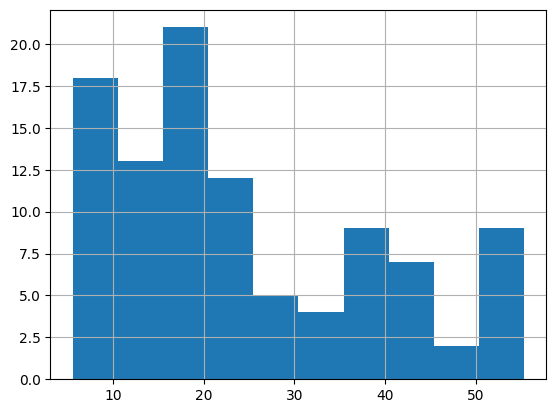

In [125]:
df["Marks"].hist()

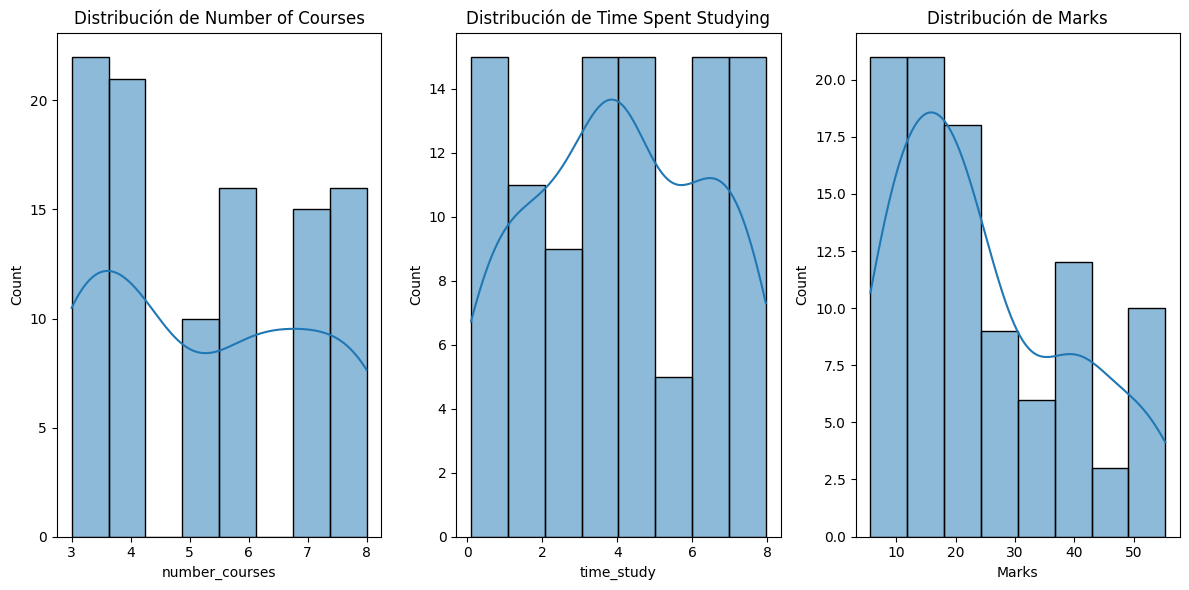

In [126]:
# Visualización de la distribución de las variables
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['number_courses'], kde=True)
plt.title('Distribución de Number of Courses')

plt.subplot(1, 3, 2)
sns.histplot(df['time_study'], kde=True)
plt.title('Distribución de Time Spent Studying')

plt.subplot(1, 3, 3)
sns.histplot(df['Marks'], kde=True)
plt.title('Distribución de Marks')

plt.tight_layout()
plt.show()

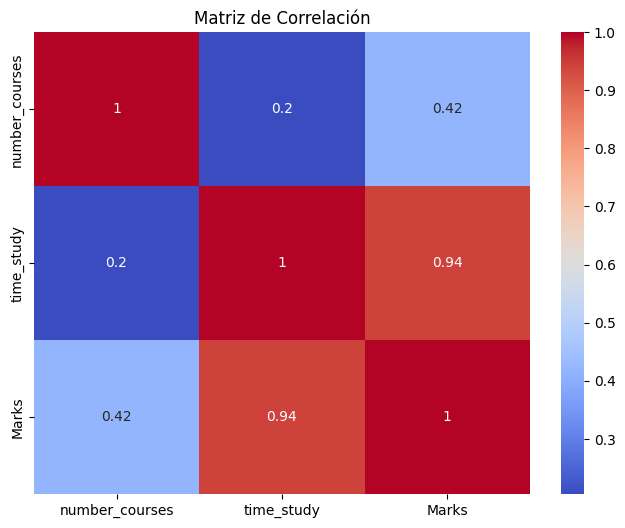

In [127]:
# Matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

### Análisis Exploratorio de Datos (EDA)
- Se ha realizado un análisis exploratorio de los datos, incluyendo la visualización de las distribuciones de las variables `number_courses`, `time_study` y `Marks`.
- Se ha verificado la ausencia de valores nulos en el conjunto de datos.
- La matriz de correlación ha mostrado que hay una relación positiva entre `time_study` y `Marks`, lo cual indica que a mayor tiempo de estudio, las calificaciones tienden a ser más altas.

In [128]:
X = df.drop("Marks", axis=1) 
y = df["Marks"]

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
# 80% training and 20% test, random state es para que siempre se divida igual.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [132]:
scaler = StandardScaler()
lr = LinearRegression()
# Crear el pipeline con escalado y regresión lineal
pipeline_lr = Pipeline([
    ('scaler', scaler),  # Normalización de los datos
    ('lr', lr)  # Modelo de regresión lineal
])

In [133]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [134]:
# Hacer predicciones
y_pred_train_rf = pipeline_lr.predict(X_train)
y_pred_test_rf = pipeline_lr.predict(X_test)

# Evaluar el modelo
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"RMSE de entrenamiento: {train_rmse_rf}")
print(f"RMSE de prueba: {test_rmse_rf}")
print(f"R^2 de entrenamiento: {train_r2_rf}")
print(f"R^2 de prueba: {test_r2_rf}")

Score de entrenamiento: 0.934351593655942
Score de test: 0.9459936100591212


In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
# Crear una instancia del modelo de RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Crear el pipeline con escalado y RandomForestRegressor
pipeline_rf = Pipeline([
    ('scaler', scaler),  # Normalización de los datos
    ('rf', rf)  # Modelo de Random Forest Regressor
])

In [137]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(random_state=42))])

In [138]:
# Hacer predicciones
y_pred_train_rf = pipeline_rf.predict(X_train)
y_pred_test_rf = pipeline_rf.predict(X_test)

In [139]:
# Evaluar el modelo
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
train_r2_rf = r2_score(y_train, y_pred_train_rf)
test_r2_rf = r2_score(y_test, y_pred_test_rf)

print(f"RMSE de entrenamiento: {train_rmse_rf}")
print(f"RMSE de prueba: {test_rmse_rf}")
print(f"R^2 de entrenamiento: {train_r2_rf}")
print(f"R^2 de prueba: {test_r2_rf}")

RMSE de entrenamiento: 0.682160494554806
RMSE de prueba: 1.4131442880912881
R^2 de entrenamiento: 0.9974462222542123
R^2 de prueba: 0.992405352684648


In [140]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
gbr = GradientBoostingRegressor(random_state=42)

# Crear el pipeline con escalado y GradientBoostingRegressor
pipeline_gbr = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de los datos
    ('gbr', gbr)  # Modelo de Gradient Boosting Regressor
])

In [142]:
# Entrenar el pipeline con los datos de entrenamiento
pipeline_gbr.fit(X_train, y_train)

# Hacer predicciones
y_pred_train_gbr = pipeline_gbr.predict(X_train)
y_pred_test_gbr = pipeline_gbr.predict(X_test)

In [143]:
# Evaluar el modelo
train_rmse_gbr = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr))
test_rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr))
train_r2_gbr = r2_score(y_train, y_pred_train_gbr)
test_r2_gbr = r2_score(y_test, y_pred_test_gbr)

print(f"RMSE de entrenamiento: {train_rmse_gbr}")
print(f"RMSE de prueba: {test_rmse_gbr}")
print(f"R^2 de entrenamiento: {train_r2_gbr}")
print(f"R^2 de prueba: {test_r2_gbr}")

RMSE de entrenamiento: 0.17657860388999863
RMSE de prueba: 1.0935833994012312
R^2 de entrenamiento: 0.9998288857705318
R^2 de prueba: 0.9954518119393584
